In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})

In [3]:
wiki_data=pd.read_csv('pageviews_by_second.tsv',sep='\t')
sort_wiki_data=wiki_data.sort_values(by='timestamp',ascending=True)
sort_wiki_data.to_csv('pageviews_by_second_inc.tsv',sep='\t',index=False)


In [48]:
# 按分钟聚合每种site的访问量
sort_wiki_data=pd.read_csv('pageviews_by_second_inc.tsv',sep='\t')
sort_wiki_data['timestamp'] = pd.to_datetime(sort_wiki_data['timestamp'])
# 提取时间戳中的分钟
sort_wiki_data['timestamp'] = sort_wiki_data['timestamp'].dt.floor('T')
sort_wiki_data_by_minute= sort_wiki_data.groupby(['timestamp', 'site']).sum()
# timestam转回带T的格式,并替代原有的timestamp
sort_wiki_data_by_minute = sort_wiki_data_by_minute.reset_index()
sort_wiki_data_by_minute['timestamp'] = sort_wiki_data_by_minute['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')

sort_wiki_data_by_minute.to_csv('pageviews_by_minute_site.tsv',sep='\t',index=False)

In [49]:
sort_wiki_data_by_minute=pd.read_csv('pageviews_by_minute_site.tsv',sep='\t')
sort_wiki_data_by_minute.drop(['site'],axis=1,inplace=True)
sort_wiki_data_by_minute.groupby('timestamp').sum().to_csv('pageviews_by_minute.tsv',sep='\t',index=True)

In [55]:
# 为两个tsv添加minute列，值为timestamp的分钟数，从0开始，一直增加，可能会有重复的值
sort_wiki_data_by_minute=pd.read_csv('pageviews_by_minute.tsv',sep='\t')
sort_wiki_data_by_minute['timestamp'] = pd.to_datetime(sort_wiki_data_by_minute['timestamp'])
sort_wiki_data_by_minute['minute'] = range(len(sort_wiki_data_by_minute))
sort_wiki_data_by_minute.to_csv('pageviews_by_minute.tsv',sep='\t',index=False)

sort_wiki_data_by_minute_site=pd.read_csv('pageviews_by_minute_site.tsv',sep='\t')
sort_wiki_data_by_minute_site['timestamp'] = pd.to_datetime(sort_wiki_data_by_minute_site['timestamp'])
sort_wiki_data_by_minute_site['minute'] = range(len(sort_wiki_data_by_minute_site))
# 除2
sort_wiki_data_by_minute_site['minute'] = sort_wiki_data_by_minute_site['minute']//2
sort_wiki_data_by_minute_site.to_csv('pageviews_by_minute_site.tsv',sep='\t',index=False)






2434


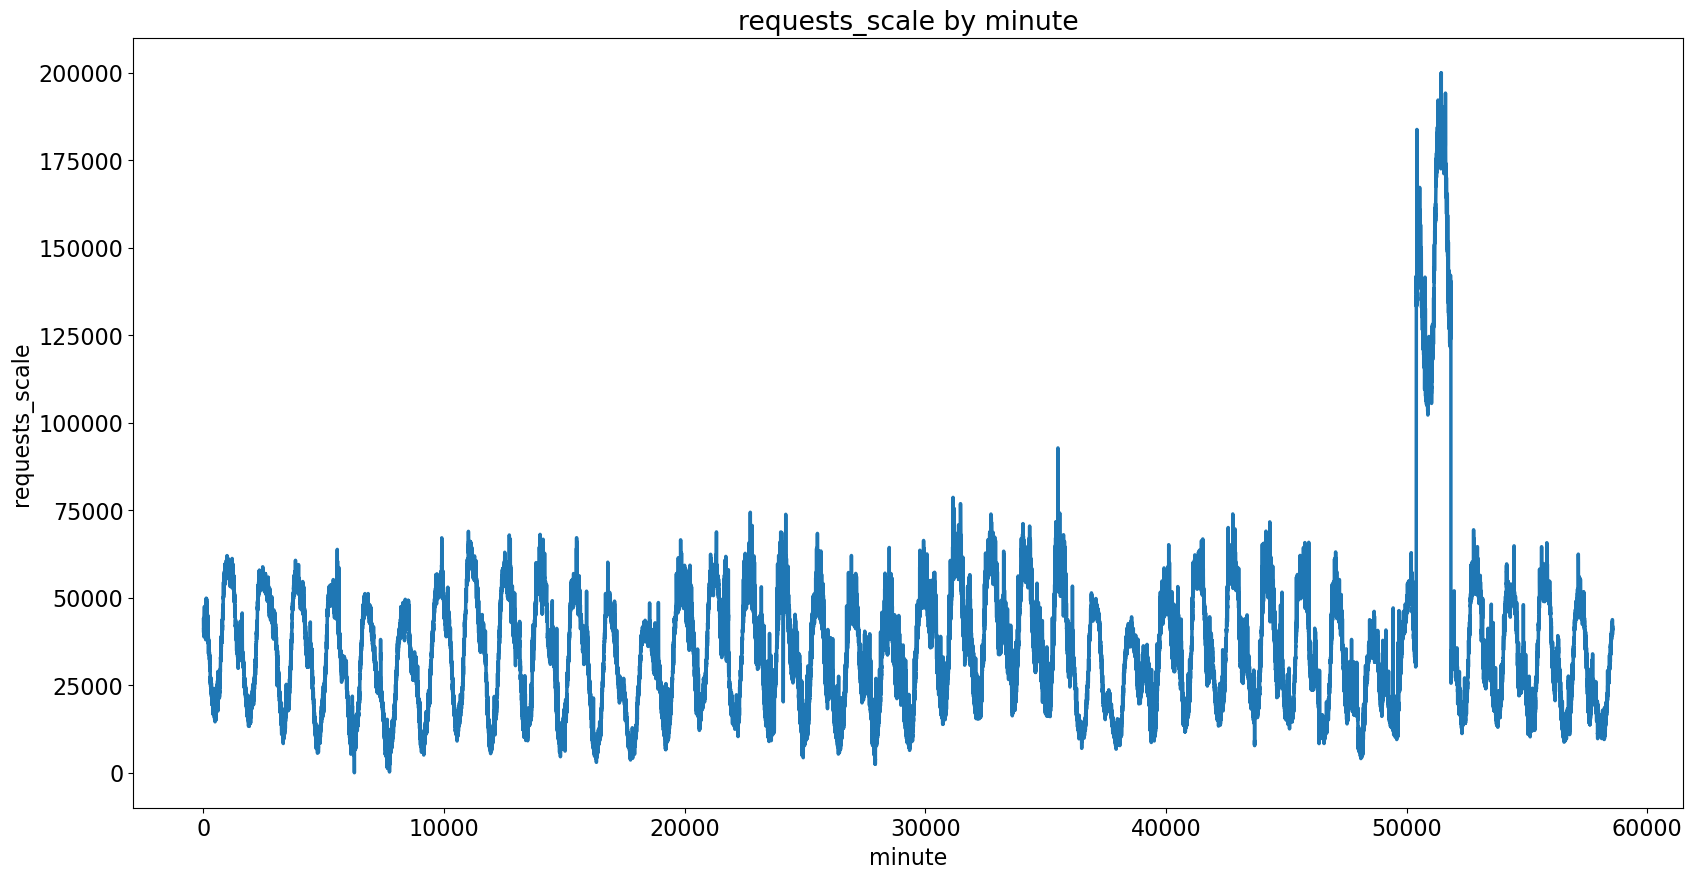

In [6]:
sort_wiki_data_by_minute=pd.read_csv('pageviews_by_minute.tsv',sep='\t')
# 将requests列按[0, 200000]进行缩放
sort_wiki_data_by_minute['requests_scale'] = round((sort_wiki_data_by_minute['requests']-sort_wiki_data_by_minute['requests'].min())/(sort_wiki_data_by_minute['requests'].max()-sort_wiki_data_by_minute['requests'].min())*200000)
# convert to int
sort_wiki_data_by_minute['requests_scale'] = sort_wiki_data_by_minute['requests_scale'].astype(int)
sort_wiki_data_by_minute.to_csv('pageviews_by_minute.tsv',sep='\t',index=False)
# 打印小于10000的数据的数量
print(sort_wiki_data_by_minute[sort_wiki_data_by_minute['requests_scale']<10000].shape[0])
# 按照每分钟的requests_scale画图
plt.figure(figsize=(20, 10))
plt.plot(sort_wiki_data_by_minute['minute'],sort_wiki_data_by_minute['requests_scale'])
plt.xlabel('minute')
plt.ylabel('requests_scale')
plt.title('requests_scale by minute')
plt.show()

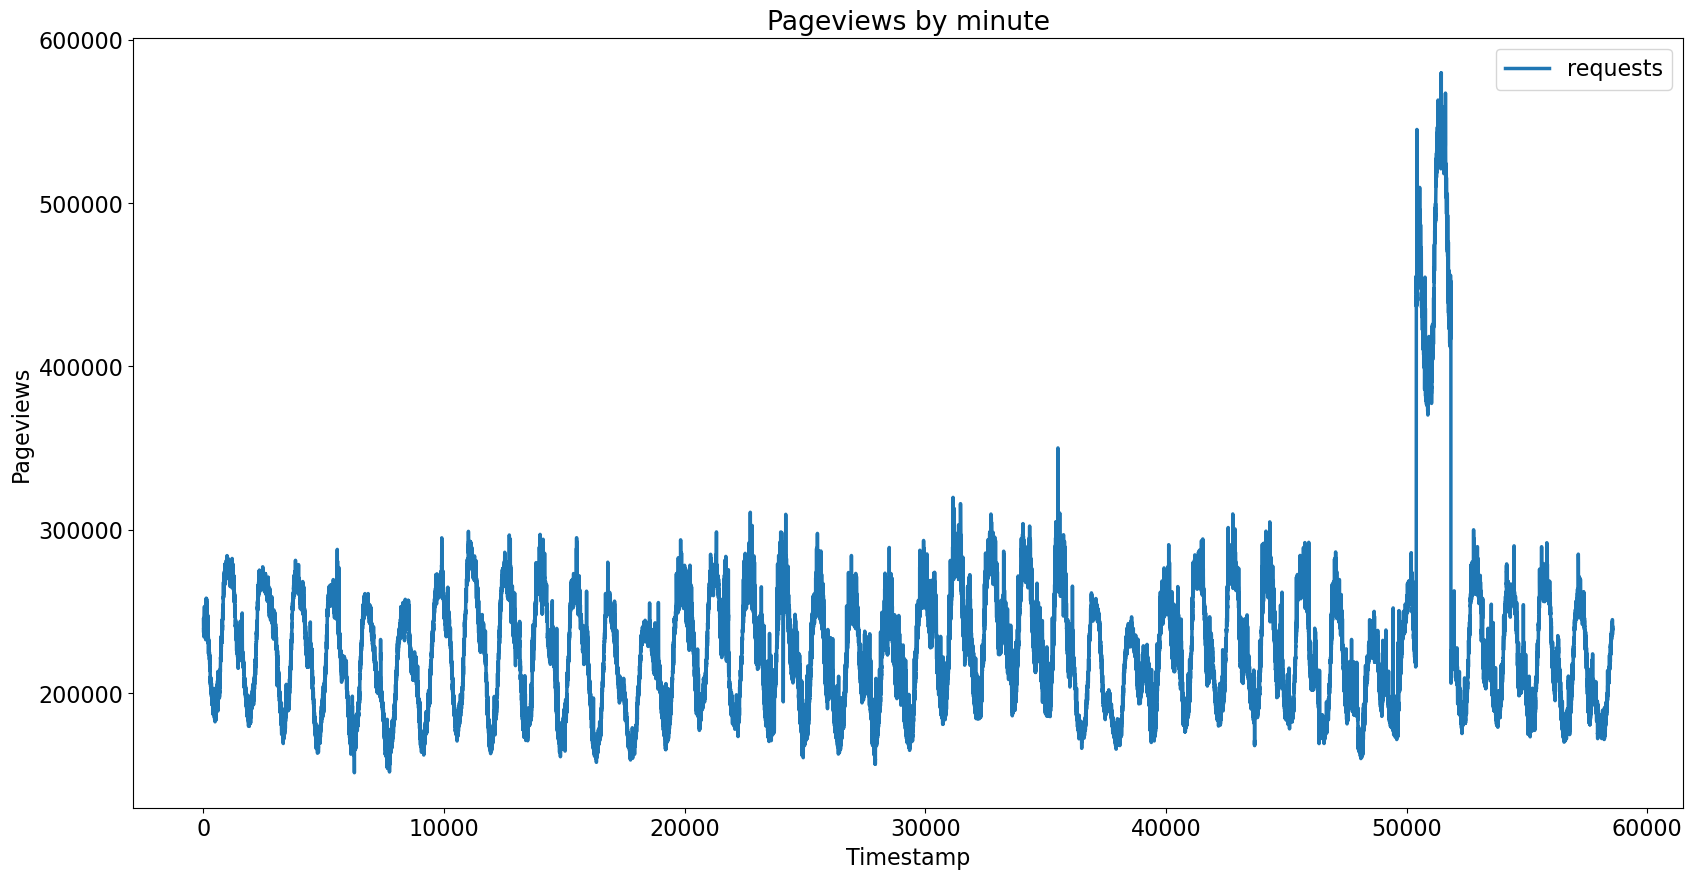

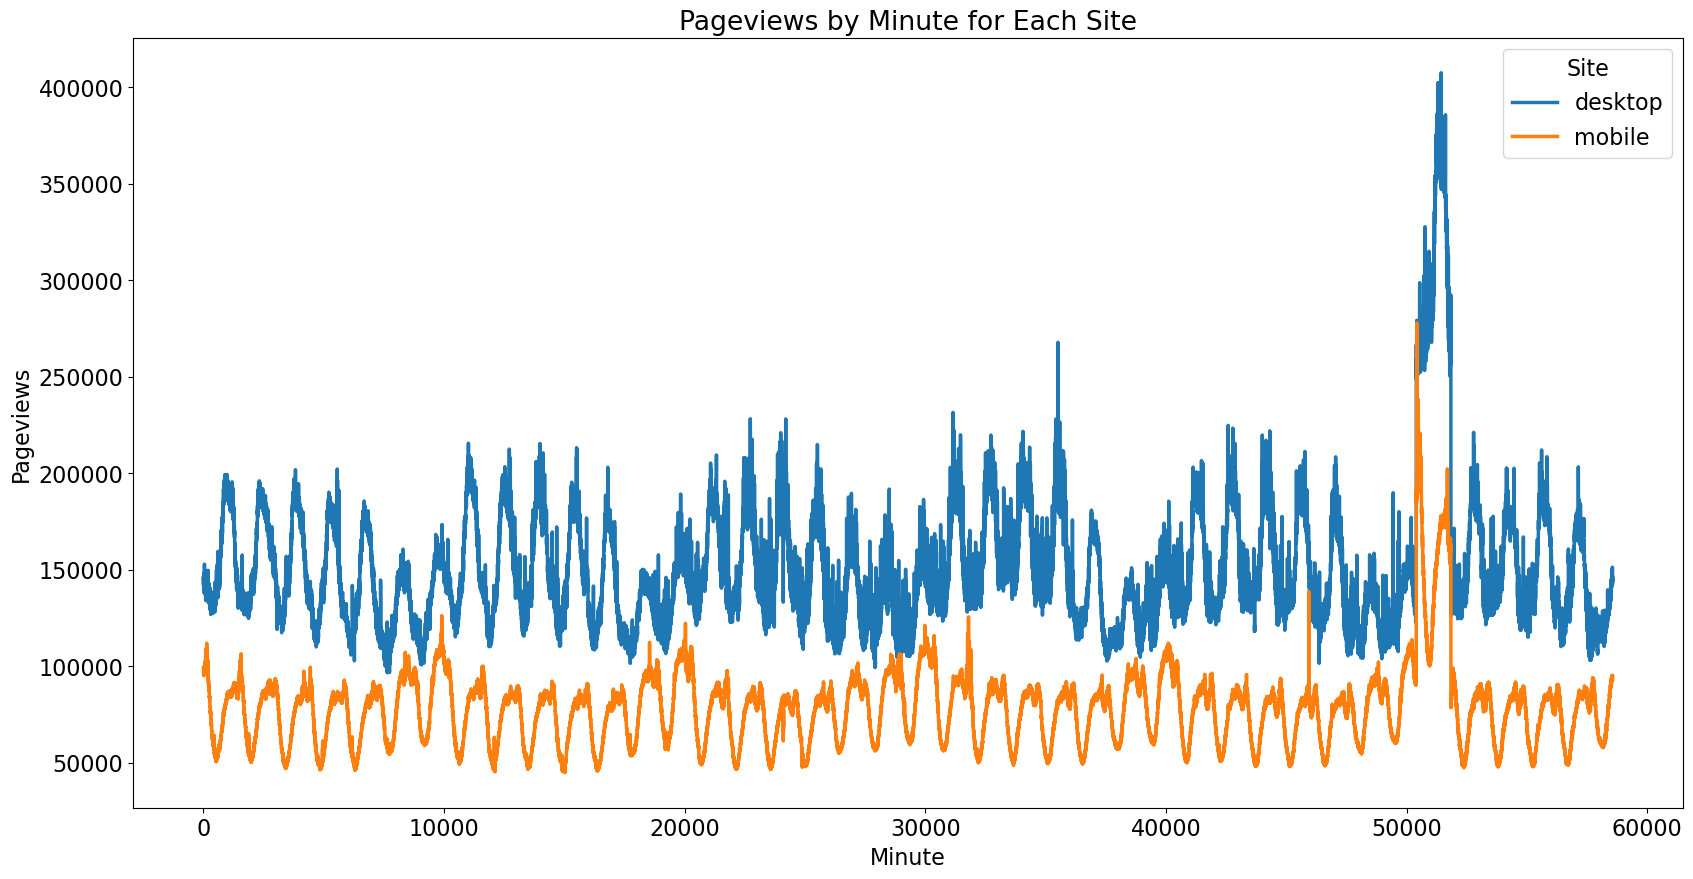

In [63]:
# 按照每分钟的访问量画图
sort_wiki_data_by_minute=pd.read_csv('pageviews_by_minute.tsv',sep='\t')
# 提取时间戳中的分钟
sort_wiki_data_by_minute.set_index('minute',inplace=True)
sort_wiki_data_by_minute.plot(figsize=(20,10))
plt.title('Pageviews by minute')
plt.xlabel('Timestamp')
plt.ylabel('Pageviews')
plt.show()

# 按照每分钟的访问量画图，按照site，每种site一条线
sort_wiki_data_by_minute_site=pd.read_csv('pageviews_by_minute_site.tsv',sep='\t')
sort_wiki_data_by_minute_site['timestamp'] = pd.to_datetime(sort_wiki_data_by_minute_site['timestamp'])

# 设置索引
sort_wiki_data_by_minute_site.set_index('timestamp', inplace=True)

# df.pivot_table 创建一个以分钟为索引，以站点类型为列的数据透视表，该透视表中包含对应的请求数量
pivot_df = sort_wiki_data_by_minute_site.pivot_table(index='minute', columns='site', values='requests', aggfunc='sum')

# plot 函数画出透视表中每个站点类型的线条
pivot_df.plot(figsize=(20, 10))

# 设置图表标题和轴标签
plt.title('Pageviews by Minute for Each Site')
plt.xlabel('Minute')
plt.ylabel('Pageviews')
plt.legend(title='Site')

# 显示图表
plt.show()







In [8]:
# 读取resource_estimates/SLOA.xlsx文件
sloa_data=pd.read_excel('resource_estimate/SLOA.xlsx',names=['requests','delay','replicas'],header=None)
sloa_data.head()
sloa_data.to_csv('resource_estimate/SLOA.tsv',sep='\t',index=False)
# 读取resource_estimates/SLOValidA文件
slovalida_data=pd.read_excel('resource_estimate/SLOValidA.xlsx',names=['requests','delay','replicas'],header=None)
slovalida_data.to_csv('resource_estimate/SLOValidA.tsv',sep='\t',index=False)